In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sudhanshukumar1729","key":"4c24e48eaa04ecc47303ae4988f1b8b9"}'}

In [ ]:
!mkdir -p ~/.kaggle  # Create a .kaggle directory
!mv kaggle.json ~/.kaggle/  # Move kaggle.json into it
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets list #check if kaggle api works or not

ref                                                               title                                                     size  lastUpdated                 downloadCount  voteCount  usabilityRating  
----------------------------------------------------------------  -------------------------------------------------  -----------  --------------------------  -------------  ---------  ---------------  
jayaantanaath/student-habits-vs-academic-performance              Student Habits vs Academic Performance                   19512  2025-04-12 10:49:08.663000           2008         38  1.0              
adilshamim8/student-depression-dataset                            Student Depression Dataset                              467020  2025-03-13 03:12:30.423000          19312        312  1.0              
atharvasoundankar/smart-farming-sensor-data-for-yield-prediction  🌾 Smart Farming Sensor Data for Yield Prediction         28385  2025-04-15 10:04:19.530000            835         25  1.0     

In [ ]:
# Download the BRATS20 dataset
!kaggle datasets download -d awsaf49/brats20-dataset-training-validation

# Extract the dataset into the 'mri_dataset' folder
!unzip brats20-dataset-training-validation.zip -d mri_dataset


Dataset URL: https://www.kaggle.com/datasets/awsaf49/brats20-dataset-training-validation
License(s): CC0-1.0
Archive:  brats20-dataset-training-validation.zip
  inflating: mri_dataset/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_001/BraTS20_Training_001_flair.nii  
  inflating: mri_dataset/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_001/BraTS20_Training_001_seg.nii  
  inflating: mri_dataset/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_001/BraTS20_Training_001_t1.nii  
  inflating: mri_dataset/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_001/BraTS20_Training_001_t1ce.nii  
  inflating: mri_dataset/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_001/BraTS20_Training_001_t2.nii  
  inflating: mri_dataset/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_002/BraTS20_Training_002_flair.nii  
  inflating: mri_dataset/BraTS2020_TrainingData/MICCAI_Bra

In [ ]:
# Install necessary libraries for training and processing
!pip install torch torchvision imageio opencv-python matplotlib scikit-image


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 64.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 34.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 39.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.6 MB/s eta 0:00:00
   ━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/127.9 MB 204.4 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 88.5 MB/s eta 0:00:00
ERROR: THESE PACKAGES DO NOT MATCH THE HASHES FROM THE REQUIREMENTS FILE. If you have updated the package versions, please update the hashes. Otherwise, examine the package contents carefully; someone ma

In [ ]:


import os
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import imageio
import numpy as np
import cv2
from skimage.io import imread
import matplotlib.pyplot as plt


In [ ]:
import os
import nibabel as nib
import numpy as np
from PIL import Image

dataset_path = "./mri_dataset/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData"
output_folder = "./high_resolution"
os.makedirs(output_folder, exist_ok=True)

count = 0
max_images = 1000

# Loop through patient folders
for patient_folder in os.listdir(dataset_path):
    patient_path = os.path.join(dataset_path, patient_folder)
    if not os.path.isdir(patient_path):
        continue  # Skip non-directory files

    print(f"Processing patient folder: {patient_folder}")

    # List files in the current patient folder
    files_in_folder = os.listdir(patient_path)
    print(f"Files in {patient_folder}: {files_in_folder}")

    # Search for the _flair.nii file in the patient folder
    flair_file = None
    for file_name in files_in_folder:
        if file_name.endswith("_flair.nii.gz") or file_name.endswith("_flair.nii"):
            flair_file = os.path.join(patient_path, file_name)
            break

    if flair_file:
        print(f"Found flair file: {flair_file}")
    else:
        print(f"No flair file found in {patient_folder}")
        continue  # Skip if no flair file is found

    # Load the MRI data from the flair.nii file
    try:
        mri = nib.load(flair_file).get_fdata()  # Load the MRI volume
    except Exception as e:
        print(f"Error loading {flair_file}: {e}")
        continue  # Skip this file if it can't be loaded

    # Normalize the data to range [0, 1]
    mri = (mri - np.min(mri)) / (np.max(mri) - np.min(mri))

    # Get the middle slice of the MRI volume
    middle_slice_idx = mri.shape[2] // 2
    middle_slice = (mri[:, :, middle_slice_idx] * 255).astype(np.uint8)  # Rescale to [0, 255]

    print(f"Saving image for patient {patient_folder}, slice index {middle_slice_idx}")

    # Convert the middle slice into an image
    img = Image.fromarray(middle_slice)

    # Save the middle slice image
    output_image_path = os.path.join(output_folder, f"mri_{count}_mask.png")
    img.save(output_image_path)

    print(f"Saved: {output_image_path}")

    count += 1
    if count >= max_images:
        break  # Stop after saving max_images

print(f"Saved {count} high-resolution MRI images to {output_folder}")


Processing patient folder: BraTS20_Training_053
Files in BraTS20_Training_053: ['BraTS20_Training_053_t1.nii', 'BraTS20_Training_053_t2.nii', 'BraTS20_Training_053_flair.nii', 'BraTS20_Training_053_t1ce.nii', 'BraTS20_Training_053_seg.nii']
Found flair file: ./mri_dataset/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_053/BraTS20_Training_053_flair.nii
Saving image for patient BraTS20_Training_053, slice index 77
Saved: ./high_resolution/mri_0_mask.png
Processing patient folder: BraTS20_Training_340
Files in BraTS20_Training_340: ['BraTS20_Training_340_t2.nii', 'BraTS20_Training_340_flair.nii', 'BraTS20_Training_340_t1ce.nii', 'BraTS20_Training_340_seg.nii', 'BraTS20_Training_340_t1.nii']
Found flair file: ./mri_dataset/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_340/BraTS20_Training_340_flair.nii
Saving image for patient BraTS20_Training_340, slice index 77
Saved: ./high_resolution/mri_1_mask.png
Processing patient folder: BraTS20_Train

In [ ]:
import os
import glob
import torch
import torch.nn.functional as F
from torchvision import transforms
from torch.utils.data import Dataset
from PIL import Image

class MRIDataset(Dataset):
    def __init__(self, high_res_folder, low_res_folder):
        self.high_res_folder = high_res_folder
        self.low_res_folder = low_res_folder
        self.image_paths = glob.glob(os.path.join(high_res_folder, "*.png"))

        if not self.image_paths:
            print(f"No PNG images found in {high_res_folder}")

        self.hr_transform = transforms.Compose([transforms.ToTensor()])
        os.makedirs(self.low_res_folder, exist_ok=True)

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):  # <-- INSIDE the class now!
        hr_image_path = self.image_paths[idx]
        hr_image_name = os.path.basename(hr_image_path)
        lr_image_path = os.path.join(self.low_res_folder, hr_image_name)

        # Always load high-res image
        hr_image = Image.open(hr_image_path).convert('L')
        hr_tensor = self.hr_transform(hr_image)

        # Check if the low-resolution pair already exists
        if not os.path.exists(lr_image_path):
            print(f"Generating low-res pair for {hr_image_name}")

            # Create low-res version
            lr_tensor = F.interpolate(hr_tensor.unsqueeze(0), scale_factor=0.5, mode='bilinear', align_corners=False).squeeze(0)
            lr_tensor = F.interpolate(lr_tensor.unsqueeze(0), size=hr_tensor.shape[-2:], mode='bilinear', align_corners=False).squeeze(0)

            # Save low-res image
            lr_image = transforms.ToPILImage()(lr_tensor)
            lr_image.save(lr_image_path)
            print(f"Saved low-res image to {lr_image_path}")
        else:
            print(f"Low-res pair already exists for {hr_image_name}")

        # Load low-res image (either generated or pre-existing)
        lr_image = Image.open(lr_image_path).convert('L')
        lr_tensor = self.hr_transform(lr_image)

        return lr_tensor, hr_tensor


In [ ]:
high_res_folder = "./high_resolution"
low_res_folder = "./low_resolution"

# Step 1: Create dataset
dataset = MRIDataset(high_res_folder=high_res_folder, low_res_folder=low_res_folder)

# Step 2: Check if dataset has images
print(f"Found {len(dataset)} images.")

# Step 3: Access dataset items to trigger __getitem__
# Process ALL images
for i in range(len(dataset)):
    lr, hr = dataset[i]
    if i % 50 == 0:
        print(f"Processed {i} images...")



Found 369 images.
Generating low-res pair for mri_275_mask.png
Saved low-res image to ./low_resolution/mri_275_mask.png
Processed 0 images...
Generating low-res pair for mri_326_mask.png
Saved low-res image to ./low_resolution/mri_326_mask.png
Generating low-res pair for mri_274_mask.png
Saved low-res image to ./low_resolution/mri_274_mask.png
Generating low-res pair for mri_42_mask.png
Saved low-res image to ./low_resolution/mri_42_mask.png
Generating low-res pair for mri_361_mask.png
Saved low-res image to ./low_resolution/mri_361_mask.png
Generating low-res pair for mri_243_mask.png
Saved low-res image to ./low_resolution/mri_243_mask.png
Generating low-res pair for mri_302_mask.png
Saved low-res image to ./low_resolution/mri_302_mask.png
Generating low-res pair for mri_329_mask.png
Saved low-res image to ./low_resolution/mri_329_mask.png
Generating low-res pair for mri_2_mask.png
Saved low-res image to ./low_resolution/mri_2_mask.png
Generating low-res pair for mri_150_mask.png
Sav

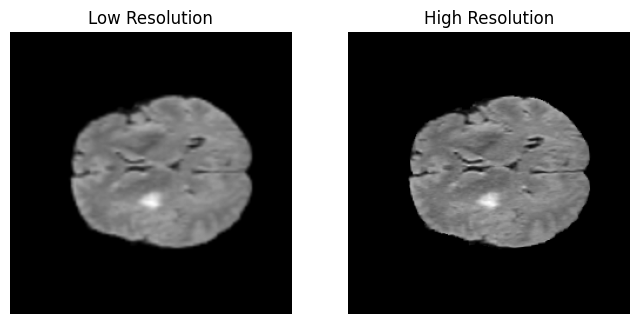

In [ ]:
import matplotlib.pyplot as plt

# Assume lr, hr are loaded (for example lr, hr = dataset[0])

# Convert tensors to numpy arrays
lr_np = lr.squeeze(0).numpy()  # remove channel dimension
hr_np = hr.squeeze(0).numpy()

# Plot side by side
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(lr_np, cmap='gray')
plt.title('Low Resolution')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(hr_np, cmap='gray')
plt.title('High Resolution')
plt.axis('off')

plt.show()


In [ ]:
import shutil

# Paths
high_res_folder = './high_resolution'
low_res_folder = './low_resolution'

# Zip high resolution folder
shutil.make_archive('high_resolution', 'zip', high_res_folder)

# Zip low resolution folder
shutil.make_archive('low_resolution', 'zip', low_res_folder)

print("Both folders zipped successfully.")


Both folders zipped successfully.


In [ ]:
from google.colab import files

# files.download('high_resolution.zip')
files.download('low_resolution.zip')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import torch
import torch.nn as nn

class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(1, 64, 9, padding=4),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 32, 3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(32, 1, 5, padding=2)
        )

    def forward(self, x):
        return self.model(x)


In [ ]:
import torch
import torch.nn as nn

class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()

        # Convolutional layers
        self.conv1 = nn.Conv2d(1, 64, kernel_size=4, stride=2, padding=1)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1)

        # Adaptive Pooling to make sure the output size is fixed
        self.adaptive_pool = nn.AdaptiveAvgPool2d((1, 1))

        # Fully connected layer
        self.fc = nn.Linear(128, 1)  # Since the output from adaptive pool is 128 x 1 x 1

        self.relu = nn.LeakyReLU(0.2)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.relu(self.conv2(x))

        # Apply adaptive pooling to get a fixed-size output
        x = self.adaptive_pool(x)

        # Flatten the output
        x = x.view(x.size(0), -1)  # Flatten the tensor into a 1D vector

        x = self.fc(x)
        return self.sigmoid(x)


In [ ]:
import torch.optim as optim
from torch.utils.data import DataLoader

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Instantiate
generator = Generator().to(device)
discriminator = Discriminator().to(device)

# Optimizers
optimizer_G = optim.Adam(generator.parameters(), lr=1e-4)
optimizer_D = optim.Adam(discriminator.parameters(), lr=1e-4)

# Loss functions
adversarial_loss = nn.BCELoss()
pixelwise_loss = nn.L1Loss()

# Dataset and Loader
train_dataset = MRIDataset(high_res_folder="./high_resolution", low_res_folder="./low_resolution")
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)

epochs = 50

# Training
for epoch in range(epochs):
    for lr_imgs, hr_imgs in train_loader:
        lr_imgs, hr_imgs = lr_imgs.to(device), hr_imgs.to(device)

        valid = torch.ones((lr_imgs.size(0), 1), device=device)
        fake = torch.zeros((lr_imgs.size(0), 1), device=device)

        # Train Generator
        optimizer_G.zero_grad()
        gen_hr = generator(lr_imgs)
        pred_fake = discriminator(gen_hr)

        g_loss = 0.001 * adversarial_loss(pred_fake, valid) + pixelwise_loss(gen_hr, hr_imgs)
        g_loss.backward()
        optimizer_G.step()

        # Train Discriminator
        optimizer_D.zero_grad()

        pred_real = discriminator(hr_imgs)
        pred_fake = discriminator(gen_hr.detach())

        d_loss = (adversarial_loss(pred_real, valid) + adversarial_loss(pred_fake, fake)) / 2
        d_loss.backward()
        optimizer_D.step()

    print(f"[Epoch {epoch+1}/{epochs}] G Loss: {g_loss.item():.4f}, D Loss: {d_loss.item():.4f}")


Streaming output truncated to the last 5000 lines.
Low-res pair already exists for mri_54_mask.png
Low-res pair already exists for mri_286_mask.png
Low-res pair already exists for mri_263_mask.png
Low-res pair already exists for mri_65_mask.png
Low-res pair already exists for mri_280_mask.png
Low-res pair already exists for mri_354_mask.png
Low-res pair already exists for mri_311_mask.png
Low-res pair already exists for mri_181_mask.png
Low-res pair already exists for mri_11_mask.png
Low-res pair already exists for mri_13_mask.png
Low-res pair already exists for mri_46_mask.png
Low-res pair already exists for mri_275_mask.png
Low-res pair already exists for mri_21_mask.png
Low-res pair already exists for mri_203_mask.png
Low-res pair already exists for mri_209_mask.png
Low-res pair already exists for mri_131_mask.png
Low-res pair already exists for mri_32_mask.png
Low-res pair already exists for mri_227_mask.png
Low-res pair already exists for mri_234_mask.png
Low-res pair already exis

In [ ]:
# Save generator and discriminator models
torch.save(generator.state_dict(), 'generator.pth')
torch.save(discriminator.state_dict(), 'discriminator.pth')


In [ ]:
from google.colab import files

# Download the saved model files
files.download('generator.pth')
files.download('discriminator.pth')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import os


In [ ]:
# dataset loader
class MRIDataset(Dataset):
    def __init__(self, high_res_folder, low_res_folder):
        self.hr_folder = high_res_folder
        self.lr_folder = low_res_folder
        self.hr_images = os.listdir(high_res_folder)
        self.lr_images = os.listdir(low_res_folder)
        self.transform = transforms.ToTensor()

    def __len__(self):
        return len(self.hr_images)

    def __getitem__(self, idx):
        hr_path = os.path.join(self.hr_folder, self.hr_images[idx])
        lr_path = os.path.join(self.lr_folder, self.lr_images[idx])

        hr_image = Image.open(hr_path).convert('L')
        lr_image = Image.open(lr_path).convert('L')

        hr_tensor = self.transform(hr_image)
        lr_tensor = self.transform(lr_image)

        return lr_tensor, hr_tensor


In [ ]:
# rfb_esrgan
class ResidualBlock(nn.Module):
    def __init__(self, channels):
        super(ResidualBlock, self).__init__()
        self.conv1 = nn.Conv2d(channels, channels, 3, 1, 1)
        self.relu = nn.LeakyReLU(0.2)
        self.conv2 = nn.Conv2d(channels, channels, 3, 1, 1)

    def forward(self, x):
        identity = x
        out = self.conv1(x)
        out = self.relu(out)
        out = self.conv2(out)
        return out + identity


In [ ]:
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()

        self.initial = nn.Conv2d(1, 64, 9, 1, 4)
        self.relu = nn.LeakyReLU(0.2)

        self.resblock1 = ResidualBlock(64)
        self.resblock2 = ResidualBlock(64)

        self.mid_conv = nn.Conv2d(64, 64, 3, 1, 1)

        self.upsample = nn.Sequential(
            nn.Conv2d(64, 256, 3, 1, 1),
            nn.PixelShuffle(2),
            nn.LeakyReLU(0.2),
            nn.Conv2d(64, 1, 9, 1, 4)
        )

    def forward(self, x):
        initial = self.relu(self.initial(x))
        x = self.resblock1(initial)
        x = self.resblock2(x)
        x = self.mid_conv(x)
        x = x + initial
        x = self.upsample(x)
        return x


In [ ]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()

        self.features = nn.Sequential(
            nn.Conv2d(1, 64, 3, 2, 1),
            nn.LeakyReLU(0.2),

            nn.Conv2d(64, 128, 3, 2, 1),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2),

            nn.Conv2d(128, 256, 3, 2, 1),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2),
        )

        self.classifier = nn.Sequential(
            nn.AdaptiveAvgPool2d((4, 4)),  # <-- this automatically resizes!
            nn.Flatten(),
            nn.Linear(256 * 4 * 4, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

generator = Generator().to(device)
discriminator = Discriminator().to(device)

optimizer_G = optim.Adam(generator.parameters(), lr=1e-4)
optimizer_D = optim.Adam(discriminator.parameters(), lr=1e-4)

adversarial_loss = nn.BCELoss()
pixelwise_loss = nn.L1Loss()

train_dataset = MRIDataset(high_res_folder="./high_resolution", low_res_folder="./low_resolution")
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)

epochs = 30  # You can change to 50 if you want better results

for epoch in range(epochs):
    for lr_imgs, hr_imgs in train_loader:
        lr_imgs, hr_imgs = lr_imgs.to(device), hr_imgs.to(device)

        valid = torch.ones((lr_imgs.size(0), 1), device=device)
        fake = torch.zeros((lr_imgs.size(0), 1), device=device)

        # Train Generator
        optimizer_G.zero_grad()
        gen_hr = generator(lr_imgs)

        #Resize gen_hr to match hr_imgs size
        gen_hr = torch.nn.functional.interpolate(gen_hr, size=(hr_imgs.shape[2], hr_imgs.shape[3]), mode='bilinear', align_corners=False)

        pred_fake = discriminator(gen_hr)

        g_loss = 0.001 * adversarial_loss(pred_fake, valid) + pixelwise_loss(gen_hr, hr_imgs)
        g_loss.backward()
        optimizer_G.step()

        # Train Discriminator
        optimizer_D.zero_grad()

        pred_real = discriminator(hr_imgs)
        pred_fake = discriminator(gen_hr.detach())

        d_loss = (adversarial_loss(pred_real, valid) + adversarial_loss(pred_fake, fake)) / 2
        d_loss.backward()
        optimizer_D.step()

    print(f"[Epoch {epoch+1}/{epochs}] G Loss: {g_loss.item():.4f}, D Loss: {d_loss.item():.4f}")

# Save models
torch.save(generator.state_dict(), "generator.pth")
torch.save(discriminator.state_dict(), "discriminator.pth")


[Epoch 1/30] G Loss: 0.0156, D Loss: 0.1390
[Epoch 2/30] G Loss: 0.0114, D Loss: 1.1428
[Epoch 3/30] G Loss: 0.0146, D Loss: 0.3157
[Epoch 4/30] G Loss: 0.0165, D Loss: 1.3742
[Epoch 5/30] G Loss: 0.0138, D Loss: 0.1478
[Epoch 6/30] G Loss: 0.0096, D Loss: 0.5163
[Epoch 7/30] G Loss: 0.0095, D Loss: 0.0987
[Epoch 8/30] G Loss: 0.0071, D Loss: 0.3100
[Epoch 9/30] G Loss: 0.0080, D Loss: 0.4480
[Epoch 10/30] G Loss: 0.0093, D Loss: 0.1584
[Epoch 11/30] G Loss: 0.0094, D Loss: 0.8870
[Epoch 12/30] G Loss: 0.0093, D Loss: 0.0687
[Epoch 13/30] G Loss: 0.0095, D Loss: 0.2217
[Epoch 14/30] G Loss: 0.0110, D Loss: 0.0692
[Epoch 15/30] G Loss: 0.0123, D Loss: 0.4763
[Epoch 16/30] G Loss: 0.0098, D Loss: 0.1116
[Epoch 17/30] G Loss: 0.0100, D Loss: 0.5398
[Epoch 18/30] G Loss: 0.0137, D Loss: 0.0154
[Epoch 19/30] G Loss: 0.0135, D Loss: 0.0635
[Epoch 20/30] G Loss: 0.0107, D Loss: 0.9833
[Epoch 21/30] G Loss: 0.0094, D Loss: 0.0386
[Epoch 22/30] G Loss: 0.0100, D Loss: 0.6301
[Epoch 23/30] G Los

In [ ]:
from google.colab import files

# Download the saved model files
files.download('generator.pth')
files.download('discriminator.pth')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

nesrgan

In [ ]:
# 1. Imports
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as transforms
from PIL import Image
import os

In [ ]:
class MRIDataset(Dataset):
    def __init__(self, high_res_folder, low_res_folder):
        self.high_res_folder = high_res_folder
        self.low_res_folder = low_res_folder
        self.high_res_files = sorted(os.listdir(high_res_folder))
        self.low_res_files = sorted(os.listdir(low_res_folder))

        self.hr_transform = transforms.Compose([
            transforms.Grayscale(),
            transforms.ToTensor(),
        ])
        self.lr_transform = transforms.Compose([
            transforms.Grayscale(),
            transforms.ToTensor(),
        ])

    def __len__(self):
        return len(self.low_res_files)

    def __getitem__(self, idx):
        hr_path = os.path.join(self.high_res_folder, self.high_res_files[idx])
        lr_path = os.path.join(self.low_res_folder, self.low_res_files[idx])

        hr_image = Image.open(hr_path).convert('L')
        lr_image = Image.open(lr_path).convert('L')

        hr_image = hr_image.resize((480, 480))  # Force high-res to 480x480
        lr_image = lr_image.resize((240, 240))  # Force low-res to 240x240

        hr_tensor = self.hr_transform(hr_image)
        lr_tensor = self.lr_transform(lr_image)

        return lr_tensor, hr_tensor


In [ ]:
# 3. Generator (Small NESRGAN)
class ResidualBlock(nn.Module):
    def __init__(self, channels):
        super(ResidualBlock, self).__init__()
        self.block = nn.Sequential(
            nn.Conv2d(channels, channels, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(channels),
            nn.PReLU(),
            nn.Conv2d(channels, channels, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(channels)
        )

    def forward(self, x):
        return x + self.block(x)


In [ ]:
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.initial = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=9, stride=1, padding=4),
            nn.PReLU()
        )

        self.residuals = nn.Sequential(
            ResidualBlock(64),
            ResidualBlock(64),
            ResidualBlock(64)
        )

        self.conv_mid = nn.Sequential(
            nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64)
        )

        self.upsample = nn.Sequential(
            nn.Conv2d(64, 256, kernel_size=3, stride=1, padding=1),
            nn.PixelShuffle(2),
            nn.PReLU(),
            nn.Conv2d(64, 1, kernel_size=9, stride=1, padding=4)
        )

    def forward(self, x):
        initial = self.initial(x)
        x = self.residuals(initial)
        x = self.conv_mid(x)
        x = x + initial
        x = self.upsample(x)
        return x

In [ ]:
# 4. Discriminator (Simple)
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=3, stride=1, padding=1),
            nn.LeakyReLU(0.2),

            nn.Conv2d(64, 64, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm2d(64),
            nn.LeakyReLU(0.2),

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2),

            nn.Conv2d(128, 128, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2),

            nn.AdaptiveAvgPool2d(1),
            nn.Flatten(),
            nn.Linear(128, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

In [ ]:
# 5. Training

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
generator = Generator().to(device)
discriminator = Discriminator().to(device)

optimizer_G = optim.Adam(generator.parameters(), lr=1e-4)
optimizer_D = optim.Adam(discriminator.parameters(), lr=1e-4)

adversarial_loss = nn.BCELoss()
pixelwise_loss = nn.L1Loss()

train_dataset = MRIDataset("./high_resolution", "./low_resolution")
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)

epochs = 30  # should complete training in about 1 hour depending on your hardware

for epoch in range(epochs):
    for lr_imgs, hr_imgs in train_loader:
        lr_imgs, hr_imgs = lr_imgs.to(device), hr_imgs.to(device)

        valid = torch.ones((lr_imgs.size(0), 1), device=device)
        fake = torch.zeros((lr_imgs.size(0), 1), device=device)

        # Train Generator
        optimizer_G.zero_grad()
        gen_hr = generator(lr_imgs)
        pred_fake = discriminator(gen_hr)
        g_loss = 0.001 * adversarial_loss(pred_fake, valid) + pixelwise_loss(gen_hr, hr_imgs)
        g_loss.backward()
        optimizer_G.step()

        # Train Discriminator
        optimizer_D.zero_grad()
        pred_real = discriminator(hr_imgs)
        pred_fake = discriminator(gen_hr.detach())
        d_loss = (adversarial_loss(pred_real, valid) + adversarial_loss(pred_fake, fake)) / 2
        d_loss.backward()
        optimizer_D.step()

    print(f"[Epoch {epoch+1}/{epochs}] G Loss: {g_loss.item():.4f}, D Loss: {d_loss.item():.4f}")

# Save models
torch.save(generator.state_dict(), "nesrgan_generator.pth")
torch.save(discriminator.state_dict(), "nesrgan_discriminator.pth")

[Epoch 1/30] G Loss: 0.0323, D Loss: 0.5660
[Epoch 2/30] G Loss: 0.0372, D Loss: 0.4725
[Epoch 3/30] G Loss: 0.0251, D Loss: 0.3908
[Epoch 4/30] G Loss: 0.0573, D Loss: 0.4227
[Epoch 5/30] G Loss: 0.0169, D Loss: 0.3240
[Epoch 6/30] G Loss: 0.0418, D Loss: 0.3027
[Epoch 7/30] G Loss: 0.0273, D Loss: 0.2455
[Epoch 8/30] G Loss: 0.0662, D Loss: 0.2661
[Epoch 9/30] G Loss: 0.0298, D Loss: 0.2406
[Epoch 10/30] G Loss: 0.0287, D Loss: 0.2004
[Epoch 11/30] G Loss: 0.0286, D Loss: 0.1979
[Epoch 12/30] G Loss: 0.0116, D Loss: 0.1875
[Epoch 13/30] G Loss: 0.0236, D Loss: 0.1727
[Epoch 14/30] G Loss: 0.0364, D Loss: 0.1504
[Epoch 15/30] G Loss: 0.0142, D Loss: 0.1499
[Epoch 16/30] G Loss: 0.0246, D Loss: 0.1737
[Epoch 17/30] G Loss: 0.0216, D Loss: 0.1213
[Epoch 18/30] G Loss: 0.0131, D Loss: 0.1186
[Epoch 19/30] G Loss: 0.0113, D Loss: 0.1143
[Epoch 20/30] G Loss: 0.0119, D Loss: 0.0958
[Epoch 21/30] G Loss: 0.0138, D Loss: 0.1039
[Epoch 22/30] G Loss: 0.0186, D Loss: 0.0798
[Epoch 23/30] G Los

In [ ]:
from google.colab import files

# Download the saved model files
files.download('nesrgan_generator.pth')
files.download('nesrgan_discriminator.pth')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

fine tuning

In [ ]:
from google.colab import files
import zipfile
import os

# Upload the zip file
uploaded = files.upload()  # Choose your .zip folder file

# Extract the uploaded zip file
for filename in uploaded.keys():
    if filename.endswith('.zip'):
        with zipfile.ZipFile(filename, 'r') as zip_ref:
            zip_ref.extractall("/content/")  # You can change this path if needed
        print(f"Extracted {filename} to /content/")


Saving low_resolution.zip to low_resolution.zip
Extracted low_resolution.zip to /content/


In [ ]:
import zipfile
import os

with zipfile.ZipFile("/content/low_resolution.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/low_resolution")

with zipfile.ZipFile("/content/high_resolution.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/high_resolution")


In [ ]:
# Fine-tune NESRGAN

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

# Assuming MRIDataset, Generator, and Discriminator classes are already defined

# Load pre-trained models
generator = Generator()
discriminator = Discriminator()

generator.load_state_dict(torch.load("nesrgan_generator.pth"))
discriminator.load_state_dict(torch.load("nesrgan_discriminator.pth"))

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
generator = generator.to(device)
discriminator = discriminator.to(device)

# Define optimizers and losses
optimizer_G = optim.Adam(generator.parameters(), lr=1e-5)  # Lower learning rate for fine-tuning
optimizer_D = optim.Adam(discriminator.parameters(), lr=1e-5)

adversarial_loss = nn.BCELoss()
pixelwise_loss = nn.L1Loss()

# Load your (possibly new or augmented) dataset
train_dataset = MRIDataset("/content/high_resolution", "/content/low_resolution")
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)

fine_tune_epochs = 30  # Adjust based on results

for epoch in range(fine_tune_epochs):
    for lr_imgs, hr_imgs in train_loader:
        lr_imgs, hr_imgs = lr_imgs.to(device), hr_imgs.to(device)
        valid = torch.ones((lr_imgs.size(0), 1), device=device)
        fake = torch.zeros((lr_imgs.size(0), 1), device=device)

        # Train Generator
        optimizer_G.zero_grad()
        gen_hr = generator(lr_imgs)
        pred_fake = discriminator(gen_hr)
        g_loss = 0.001 * adversarial_loss(pred_fake, valid) + pixelwise_loss(gen_hr, hr_imgs)
        g_loss.backward()
        optimizer_G.step()

        # Train Discriminator
        optimizer_D.zero_grad()
        pred_real = discriminator(hr_imgs)
        pred_fake = discriminator(gen_hr.detach())
        d_loss = (adversarial_loss(pred_real, valid) + adversarial_loss(pred_fake, fake)) / 2
        d_loss.backward()
        optimizer_D.step()

    print(f"[Fine-tune Epoch {epoch+1}/{fine_tune_epochs}] G Loss: {g_loss.item():.4f}, D Loss: {d_loss.item():.4f}")

# Save fine-tuned models
torch.save(generator.state_dict(), "nesrgan_generator_finetuned.pth")
torch.save(discriminator.state_dict(), "nesrgan_discriminator_finetuned.pth")


[Fine-tune Epoch 1/30] G Loss: 0.0079, D Loss: 0.0641
[Fine-tune Epoch 2/30] G Loss: 0.0067, D Loss: 0.0796
[Fine-tune Epoch 3/30] G Loss: 0.0066, D Loss: 0.0728
[Fine-tune Epoch 4/30] G Loss: 0.0066, D Loss: 0.0688
[Fine-tune Epoch 5/30] G Loss: 0.0066, D Loss: 0.0685
[Fine-tune Epoch 6/30] G Loss: 0.0063, D Loss: 0.0970
[Fine-tune Epoch 7/30] G Loss: 0.0059, D Loss: 0.0757
[Fine-tune Epoch 8/30] G Loss: 0.0057, D Loss: 0.1025
[Fine-tune Epoch 9/30] G Loss: 0.0065, D Loss: 0.0671
[Fine-tune Epoch 10/30] G Loss: 0.0060, D Loss: 0.0709
[Fine-tune Epoch 11/30] G Loss: 0.0055, D Loss: 0.0785
[Fine-tune Epoch 12/30] G Loss: 0.0066, D Loss: 0.0602
[Fine-tune Epoch 13/30] G Loss: 0.0054, D Loss: 0.0898
[Fine-tune Epoch 14/30] G Loss: 0.0055, D Loss: 0.0866
[Fine-tune Epoch 15/30] G Loss: 0.0062, D Loss: 0.0663
[Fine-tune Epoch 16/30] G Loss: 0.0053, D Loss: 0.0894
[Fine-tune Epoch 17/30] G Loss: 0.0060, D Loss: 0.0700
[Fine-tune Epoch 18/30] G Loss: 0.0058, D Loss: 0.0689
[Fine-tune Epoch 19

In [ ]:
from google.colab import files

# Download the sa2ved model files
files.download('nesrgan_generator_finetuned.pth')
files.download('nesrgan_discriminator_finetuned.pth')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

downloading sample input

In [ ]:
import os
import nibabel as nib
import numpy as np
from PIL import Image
from tqdm import tqdm

dataset_path = "./mri_dataset/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData"
output_folder = "./processed_mri"
os.makedirs(output_folder, exist_ok=True)

def normalize_slice(slice):
    slice = slice - np.min(slice)
    slice = slice / (np.max(slice) + 1e-8)
    slice = (slice * 255).astype(np.uint8)
    return slice

patients = sorted(os.listdir(dataset_path))
patients = patients[:101]

for idx, patient in tqdm(enumerate(patients), total=len(patients)):
    patient_path = os.path.join(dataset_path, patient)
    files = os.listdir(patient_path)

    t1_file = None
    for file in files:
        if ("t1.nii" in file or "t1.nii.gz" in file) and "t1ce" not in file.lower():
            t1_file = file
            break

    if t1_file is None:
        print(f"No T1 file found for {patient}, skipping.")
        continue

    try:
        img = nib.load(os.path.join(patient_path, t1_file))
        img_data = img.get_fdata()

        patient_output = os.path.join(output_folder, f"patient_{idx}")
        os.makedirs(patient_output, exist_ok=True)

        mid_axial = img_data.shape[2] // 2
        mid_sagittal = img_data.shape[0] // 2
        mid_coronal = img_data.shape[1] // 2

        axial_slice = img_data[:, :, mid_axial]
        sagittal_slice = img_data[mid_sagittal, :, :]
        coronal_slice = img_data[:, mid_coronal, :]

        axial_img = normalize_slice(axial_slice)
        sagittal_img = normalize_slice(sagittal_slice)
        coronal_img = normalize_slice(coronal_slice)

        Image.fromarray(axial_img).save(os.path.join(patient_output, "axial.png"))
        Image.fromarray(sagittal_img).save(os.path.join(patient_output, "sagittal.png"))
        Image.fromarray(coronal_img).save(os.path.join(patient_output, "coronal.png"))

    except Exception as e:
        print(f"Error processing {patient}: {str(e)}")

print("✅ Done processing patient_0 to patient_100.")


100%|██████████| 101/101 [00:09<00:00, 10.21it/s]

✅ Done processing patient_0 to patient_100.


In [ ]:
import shutil
from google.colab import files

# Zip
shutil.make_archive("processed_mri", 'zip', "./processed_mri")

# Download
files.download("processed_mri.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

3d slicing

In [ ]:
import os
import nibabel as nib
import numpy as np
from PIL import Image
from tqdm import tqdm

# Path to the original dataset
dataset_path = "./mri_dataset/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData"

# Output folder
output_folder = "./processed_mri"
os.makedirs(output_folder, exist_ok=True)

# Function to normalize MRI slice to [0, 255]
def normalize_slice(slice):
    slice = slice - np.min(slice)
    slice = slice / (np.max(slice) + 1e-8)
    slice = (slice * 255).astype(np.uint8)
    return slice

# List all patient folders
patients = sorted(os.listdir(dataset_path))

# Only process first 101 patients (patient_0 to patient_100)
patients = patients[:101]

# Loop over patients
for idx, patient in tqdm(enumerate(patients), total=len(patients)):
    patient_path = os.path.join(dataset_path, patient)

    # Log all files in the directory to understand what's inside
    patient_files = os.listdir(patient_path)
    print(f"[INFO] Files in {patient}: {patient_files}")  # Log files for troubleshooting

    # Search for a T1 image file (allow variations in file name)
    t1_file = None
    for file in patient_files:
        # Check for both 't1' and 't1ce' in the file name (case insensitive) and check extensions .nii and .nii.gz
        if "t1" in file.lower() and (file.endswith(".nii") or file.endswith(".nii.gz")):
            t1_file = file
            break

    if t1_file is None:
        print(f"[Warning] No T1 file found for {patient}. Available files: {patient_files}. Skipping this patient.")
        continue

    # Load the .nii or .nii.gz file
    img = nib.load(os.path.join(patient_path, t1_file))
    img_data = img.get_fdata()

    # Create patient's output folder
    patient_output = os.path.join(output_folder, f"patient_{idx}")
    os.makedirs(patient_output, exist_ok=True)

    # List to store slices for GIF creation
    gif_images = []

    # Loop over all slices along the axial axis (assuming axial slices are the most relevant for 3D visualization)
    for i in range(img_data.shape[2]):
        slice_axial = img_data[:, :, i]
        slice_normalized = normalize_slice(slice_axial)

        # Convert slice to image and add to gif list
        gif_images.append(Image.fromarray(slice_normalized))

    # Save slices as PNG images and create GIF
    for i, gif_image in enumerate(gif_images):
        gif_image.save(os.path.join(patient_output, f"slice_{i:03d}.png"))

    # Create a GIF from the axial slices
    gif_images[0].save(
        os.path.join(patient_output, "3d_view.gif"),
        save_all=True,
        append_images=gif_images[1:],
        duration=100,  # Duration of each frame (in milliseconds)
        loop=0  # Loop the GIF indefinitely
    )

print("✅ Processed patients from 0 to 100 successfully, including all slices and 3D GIFs!")


  0%|          | 0/101 [00:00<?, ?it/s]

[INFO] Files in BraTS20_Training_001: ['BraTS20_Training_001_t1ce.nii', 'BraTS20_Training_001_t1.nii', 'BraTS20_Training_001_seg.nii', 'BraTS20_Training_001_t2.nii', 'BraTS20_Training_001_flair.nii']


  1%|          | 1/101 [00:00<01:05,  1.53it/s]

[INFO] Files in BraTS20_Training_002: ['BraTS20_Training_002_t1ce.nii', 'BraTS20_Training_002_t2.nii', 'BraTS20_Training_002_flair.nii', 'BraTS20_Training_002_t1.nii', 'BraTS20_Training_002_seg.nii']


  2%|▏         | 2/101 [00:01<01:09,  1.42it/s]

[INFO] Files in BraTS20_Training_003: ['BraTS20_Training_003_t1.nii', 'BraTS20_Training_003_flair.nii', 'BraTS20_Training_003_t1ce.nii', 'BraTS20_Training_003_t2.nii', 'BraTS20_Training_003_seg.nii']


  3%|▎         | 3/101 [00:02<01:04,  1.51it/s]

[INFO] Files in BraTS20_Training_004: ['BraTS20_Training_004_seg.nii', 'BraTS20_Training_004_t2.nii', 'BraTS20_Training_004_flair.nii', 'BraTS20_Training_004_t1ce.nii', 'BraTS20_Training_004_t1.nii']


  4%|▍         | 4/101 [00:02<01:14,  1.31it/s]

[INFO] Files in BraTS20_Training_005: ['BraTS20_Training_005_t1ce.nii', 'BraTS20_Training_005_t2.nii', 'BraTS20_Training_005_flair.nii', 'BraTS20_Training_005_t1.nii', 'BraTS20_Training_005_seg.nii']


  5%|▍         | 5/101 [00:03<01:22,  1.17it/s]

[INFO] Files in BraTS20_Training_006: ['BraTS20_Training_006_seg.nii', 'BraTS20_Training_006_flair.nii', 'BraTS20_Training_006_t1ce.nii', 'BraTS20_Training_006_t1.nii', 'BraTS20_Training_006_t2.nii']


  6%|▌         | 6/101 [00:04<01:27,  1.09it/s]

[INFO] Files in BraTS20_Training_007: ['BraTS20_Training_007_t1.nii', 'BraTS20_Training_007_flair.nii', 'BraTS20_Training_007_seg.nii', 'BraTS20_Training_007_t1ce.nii', 'BraTS20_Training_007_t2.nii']


  7%|▋         | 7/101 [00:05<01:20,  1.17it/s]

[INFO] Files in BraTS20_Training_008: ['BraTS20_Training_008_flair.nii', 'BraTS20_Training_008_t1ce.nii', 'BraTS20_Training_008_t1.nii', 'BraTS20_Training_008_seg.nii', 'BraTS20_Training_008_t2.nii']


  8%|▊         | 8/101 [00:06<01:14,  1.25it/s]

[INFO] Files in BraTS20_Training_009: ['BraTS20_Training_009_seg.nii', 'BraTS20_Training_009_t1ce.nii', 'BraTS20_Training_009_t1.nii', 'BraTS20_Training_009_flair.nii', 'BraTS20_Training_009_t2.nii']


  9%|▉         | 9/101 [00:07<01:09,  1.33it/s]

[INFO] Files in BraTS20_Training_010: ['BraTS20_Training_010_t1ce.nii', 'BraTS20_Training_010_t2.nii', 'BraTS20_Training_010_seg.nii', 'BraTS20_Training_010_t1.nii', 'BraTS20_Training_010_flair.nii']


 10%|▉         | 10/101 [00:07<01:07,  1.36it/s]

[INFO] Files in BraTS20_Training_011: ['BraTS20_Training_011_flair.nii', 'BraTS20_Training_011_seg.nii', 'BraTS20_Training_011_t1.nii', 'BraTS20_Training_011_t1ce.nii', 'BraTS20_Training_011_t2.nii']


 11%|█         | 11/101 [00:08<01:04,  1.40it/s]

[INFO] Files in BraTS20_Training_012: ['BraTS20_Training_012_flair.nii', 'BraTS20_Training_012_t2.nii', 'BraTS20_Training_012_t1ce.nii', 'BraTS20_Training_012_seg.nii', 'BraTS20_Training_012_t1.nii']


 12%|█▏        | 12/101 [00:09<01:03,  1.40it/s]

[INFO] Files in BraTS20_Training_013: ['BraTS20_Training_013_t1.nii', 'BraTS20_Training_013_t2.nii', 'BraTS20_Training_013_seg.nii', 'BraTS20_Training_013_flair.nii', 'BraTS20_Training_013_t1ce.nii']


 13%|█▎        | 13/101 [00:09<01:01,  1.44it/s]

[INFO] Files in BraTS20_Training_014: ['BraTS20_Training_014_t1ce.nii', 'BraTS20_Training_014_t2.nii', 'BraTS20_Training_014_flair.nii', 'BraTS20_Training_014_seg.nii', 'BraTS20_Training_014_t1.nii']


 14%|█▍        | 14/101 [00:10<01:00,  1.44it/s]

[INFO] Files in BraTS20_Training_015: ['BraTS20_Training_015_flair.nii', 'BraTS20_Training_015_t1ce.nii', 'BraTS20_Training_015_t2.nii', 'BraTS20_Training_015_seg.nii', 'BraTS20_Training_015_t1.nii']


 15%|█▍        | 15/101 [00:11<01:00,  1.43it/s]

[INFO] Files in BraTS20_Training_016: ['BraTS20_Training_016_t1ce.nii', 'BraTS20_Training_016_seg.nii', 'BraTS20_Training_016_t1.nii', 'BraTS20_Training_016_flair.nii', 'BraTS20_Training_016_t2.nii']


 16%|█▌        | 16/101 [00:11<00:58,  1.44it/s]

[INFO] Files in BraTS20_Training_017: ['BraTS20_Training_017_t1.nii', 'BraTS20_Training_017_t1ce.nii', 'BraTS20_Training_017_flair.nii', 'BraTS20_Training_017_t2.nii', 'BraTS20_Training_017_seg.nii']


 17%|█▋        | 17/101 [00:12<00:57,  1.47it/s]

[INFO] Files in BraTS20_Training_018: ['BraTS20_Training_018_t2.nii', 'BraTS20_Training_018_seg.nii', 'BraTS20_Training_018_t1.nii', 'BraTS20_Training_018_t1ce.nii', 'BraTS20_Training_018_flair.nii']


 18%|█▊        | 18/101 [00:13<00:55,  1.50it/s]

[INFO] Files in BraTS20_Training_019: ['BraTS20_Training_019_t1ce.nii', 'BraTS20_Training_019_seg.nii', 'BraTS20_Training_019_t1.nii', 'BraTS20_Training_019_flair.nii', 'BraTS20_Training_019_t2.nii']


 19%|█▉        | 19/101 [00:13<00:54,  1.51it/s]

[INFO] Files in BraTS20_Training_020: ['BraTS20_Training_020_seg.nii', 'BraTS20_Training_020_flair.nii', 'BraTS20_Training_020_t1.nii', 'BraTS20_Training_020_t2.nii', 'BraTS20_Training_020_t1ce.nii']


 20%|█▉        | 20/101 [00:14<00:53,  1.52it/s]

[INFO] Files in BraTS20_Training_021: ['BraTS20_Training_021_flair.nii', 'BraTS20_Training_021_t1.nii', 'BraTS20_Training_021_t1ce.nii', 'BraTS20_Training_021_seg.nii', 'BraTS20_Training_021_t2.nii']


 21%|██        | 21/101 [00:15<00:51,  1.55it/s]

[INFO] Files in BraTS20_Training_022: ['BraTS20_Training_022_flair.nii', 'BraTS20_Training_022_t1.nii', 'BraTS20_Training_022_t2.nii', 'BraTS20_Training_022_seg.nii', 'BraTS20_Training_022_t1ce.nii']


 22%|██▏       | 22/101 [00:16<00:58,  1.35it/s]

[INFO] Files in BraTS20_Training_023: ['BraTS20_Training_023_flair.nii', 'BraTS20_Training_023_t2.nii', 'BraTS20_Training_023_seg.nii', 'BraTS20_Training_023_t1ce.nii', 'BraTS20_Training_023_t1.nii']


 23%|██▎       | 23/101 [00:17<01:04,  1.21it/s]

[INFO] Files in BraTS20_Training_024: ['BraTS20_Training_024_t1ce.nii', 'BraTS20_Training_024_t1.nii', 'BraTS20_Training_024_seg.nii', 'BraTS20_Training_024_flair.nii', 'BraTS20_Training_024_t2.nii']


 24%|██▍       | 24/101 [00:17<01:04,  1.19it/s]

[INFO] Files in BraTS20_Training_025: ['BraTS20_Training_025_t1ce.nii', 'BraTS20_Training_025_seg.nii', 'BraTS20_Training_025_t1.nii', 'BraTS20_Training_025_t2.nii', 'BraTS20_Training_025_flair.nii']


 25%|██▍       | 25/101 [00:18<00:59,  1.28it/s]

[INFO] Files in BraTS20_Training_026: ['BraTS20_Training_026_t1.nii', 'BraTS20_Training_026_flair.nii', 'BraTS20_Training_026_t1ce.nii', 'BraTS20_Training_026_seg.nii', 'BraTS20_Training_026_t2.nii']


 26%|██▌       | 26/101 [00:19<00:57,  1.29it/s]

[INFO] Files in BraTS20_Training_027: ['BraTS20_Training_027_seg.nii', 'BraTS20_Training_027_t2.nii', 'BraTS20_Training_027_flair.nii', 'BraTS20_Training_027_t1.nii', 'BraTS20_Training_027_t1ce.nii']


 27%|██▋       | 27/101 [00:19<00:54,  1.37it/s]

[INFO] Files in BraTS20_Training_028: ['BraTS20_Training_028_t1.nii', 'BraTS20_Training_028_t1ce.nii', 'BraTS20_Training_028_flair.nii', 'BraTS20_Training_028_t2.nii', 'BraTS20_Training_028_seg.nii']


 28%|██▊       | 28/101 [00:20<00:52,  1.40it/s]

[INFO] Files in BraTS20_Training_029: ['BraTS20_Training_029_t1.nii', 'BraTS20_Training_029_flair.nii', 'BraTS20_Training_029_seg.nii', 'BraTS20_Training_029_t2.nii', 'BraTS20_Training_029_t1ce.nii']


 29%|██▊       | 29/101 [00:21<00:49,  1.46it/s]

[INFO] Files in BraTS20_Training_030: ['BraTS20_Training_030_t2.nii', 'BraTS20_Training_030_seg.nii', 'BraTS20_Training_030_t1.nii', 'BraTS20_Training_030_flair.nii', 'BraTS20_Training_030_t1ce.nii']


 30%|██▉       | 30/101 [00:21<00:48,  1.46it/s]

[INFO] Files in BraTS20_Training_031: ['BraTS20_Training_031_t1ce.nii', 'BraTS20_Training_031_seg.nii', 'BraTS20_Training_031_t2.nii', 'BraTS20_Training_031_t1.nii', 'BraTS20_Training_031_flair.nii']


 31%|███       | 31/101 [00:22<00:48,  1.46it/s]

[INFO] Files in BraTS20_Training_032: ['BraTS20_Training_032_t2.nii', 'BraTS20_Training_032_t1ce.nii', 'BraTS20_Training_032_flair.nii', 'BraTS20_Training_032_t1.nii', 'BraTS20_Training_032_seg.nii']


 32%|███▏      | 32/101 [00:23<00:46,  1.48it/s]

[INFO] Files in BraTS20_Training_033: ['BraTS20_Training_033_flair.nii', 'BraTS20_Training_033_t1.nii', 'BraTS20_Training_033_t1ce.nii', 'BraTS20_Training_033_seg.nii', 'BraTS20_Training_033_t2.nii']


 33%|███▎      | 33/101 [00:23<00:44,  1.52it/s]

[INFO] Files in BraTS20_Training_034: ['BraTS20_Training_034_t1.nii', 'BraTS20_Training_034_seg.nii', 'BraTS20_Training_034_t1ce.nii', 'BraTS20_Training_034_t2.nii', 'BraTS20_Training_034_flair.nii']


 34%|███▎      | 34/101 [00:24<00:43,  1.53it/s]

[INFO] Files in BraTS20_Training_035: ['BraTS20_Training_035_t1.nii', 'BraTS20_Training_035_t1ce.nii', 'BraTS20_Training_035_t2.nii', 'BraTS20_Training_035_seg.nii', 'BraTS20_Training_035_flair.nii']


 35%|███▍      | 35/101 [00:25<00:42,  1.55it/s]

[INFO] Files in BraTS20_Training_036: ['BraTS20_Training_036_flair.nii', 'BraTS20_Training_036_t1ce.nii', 'BraTS20_Training_036_t2.nii', 'BraTS20_Training_036_t1.nii', 'BraTS20_Training_036_seg.nii']


 36%|███▌      | 36/101 [00:25<00:42,  1.52it/s]

[INFO] Files in BraTS20_Training_037: ['BraTS20_Training_037_seg.nii', 'BraTS20_Training_037_t2.nii', 'BraTS20_Training_037_flair.nii', 'BraTS20_Training_037_t1ce.nii', 'BraTS20_Training_037_t1.nii']


 37%|███▋      | 37/101 [00:26<00:42,  1.50it/s]

[INFO] Files in BraTS20_Training_038: ['BraTS20_Training_038_t2.nii', 'BraTS20_Training_038_t1ce.nii', 'BraTS20_Training_038_t1.nii', 'BraTS20_Training_038_seg.nii', 'BraTS20_Training_038_flair.nii']


 38%|███▊      | 38/101 [00:27<00:41,  1.52it/s]

[INFO] Files in BraTS20_Training_039: ['BraTS20_Training_039_seg.nii', 'BraTS20_Training_039_t1.nii', 'BraTS20_Training_039_t2.nii', 'BraTS20_Training_039_flair.nii', 'BraTS20_Training_039_t1ce.nii']


 39%|███▊      | 39/101 [00:27<00:41,  1.48it/s]

[INFO] Files in BraTS20_Training_040: ['BraTS20_Training_040_t1ce.nii', 'BraTS20_Training_040_t1.nii', 'BraTS20_Training_040_flair.nii', 'BraTS20_Training_040_seg.nii', 'BraTS20_Training_040_t2.nii']


 40%|███▉      | 40/101 [00:28<00:48,  1.26it/s]

[INFO] Files in BraTS20_Training_041: ['BraTS20_Training_041_seg.nii', 'BraTS20_Training_041_t2.nii', 'BraTS20_Training_041_t1.nii', 'BraTS20_Training_041_t1ce.nii', 'BraTS20_Training_041_flair.nii']


 41%|████      | 41/101 [00:29<00:51,  1.16it/s]

[INFO] Files in BraTS20_Training_042: ['BraTS20_Training_042_t1ce.nii', 'BraTS20_Training_042_seg.nii', 'BraTS20_Training_042_flair.nii', 'BraTS20_Training_042_t1.nii', 'BraTS20_Training_042_t2.nii']


 42%|████▏     | 42/101 [00:30<00:49,  1.20it/s]

[INFO] Files in BraTS20_Training_043: ['BraTS20_Training_043_seg.nii', 'BraTS20_Training_043_t1ce.nii', 'BraTS20_Training_043_t1.nii', 'BraTS20_Training_043_t2.nii', 'BraTS20_Training_043_flair.nii']


 43%|████▎     | 43/101 [00:31<00:46,  1.26it/s]

[INFO] Files in BraTS20_Training_044: ['BraTS20_Training_044_t1ce.nii', 'BraTS20_Training_044_seg.nii', 'BraTS20_Training_044_flair.nii', 'BraTS20_Training_044_t2.nii', 'BraTS20_Training_044_t1.nii']


 44%|████▎     | 44/101 [00:32<00:43,  1.31it/s]

[INFO] Files in BraTS20_Training_045: ['BraTS20_Training_045_seg.nii', 'BraTS20_Training_045_t2.nii', 'BraTS20_Training_045_t1.nii', 'BraTS20_Training_045_t1ce.nii', 'BraTS20_Training_045_flair.nii']


 45%|████▍     | 45/101 [00:32<00:40,  1.38it/s]

[INFO] Files in BraTS20_Training_046: ['BraTS20_Training_046_seg.nii', 'BraTS20_Training_046_t2.nii', 'BraTS20_Training_046_flair.nii', 'BraTS20_Training_046_t1.nii', 'BraTS20_Training_046_t1ce.nii']


 46%|████▌     | 46/101 [00:33<00:39,  1.40it/s]

[INFO] Files in BraTS20_Training_047: ['BraTS20_Training_047_t2.nii', 'BraTS20_Training_047_seg.nii', 'BraTS20_Training_047_flair.nii', 'BraTS20_Training_047_t1.nii', 'BraTS20_Training_047_t1ce.nii']


 47%|████▋     | 47/101 [00:34<00:38,  1.41it/s]

[INFO] Files in BraTS20_Training_048: ['BraTS20_Training_048_seg.nii', 'BraTS20_Training_048_t1ce.nii', 'BraTS20_Training_048_t2.nii', 'BraTS20_Training_048_t1.nii', 'BraTS20_Training_048_flair.nii']


 48%|████▊     | 48/101 [00:34<00:37,  1.41it/s]

[INFO] Files in BraTS20_Training_049: ['BraTS20_Training_049_seg.nii', 'BraTS20_Training_049_t1ce.nii', 'BraTS20_Training_049_t2.nii', 'BraTS20_Training_049_t1.nii', 'BraTS20_Training_049_flair.nii']


 49%|████▊     | 49/101 [00:35<00:36,  1.44it/s]

[INFO] Files in BraTS20_Training_050: ['BraTS20_Training_050_t1.nii', 'BraTS20_Training_050_seg.nii', 'BraTS20_Training_050_flair.nii', 'BraTS20_Training_050_t2.nii', 'BraTS20_Training_050_t1ce.nii']


 50%|████▉     | 50/101 [00:36<00:34,  1.46it/s]

[INFO] Files in BraTS20_Training_051: ['BraTS20_Training_051_flair.nii', 'BraTS20_Training_051_t1ce.nii', 'BraTS20_Training_051_t1.nii', 'BraTS20_Training_051_seg.nii', 'BraTS20_Training_051_t2.nii']


 50%|█████     | 51/101 [00:36<00:34,  1.44it/s]

[INFO] Files in BraTS20_Training_052: ['BraTS20_Training_052_t1.nii', 'BraTS20_Training_052_t1ce.nii', 'BraTS20_Training_052_flair.nii', 'BraTS20_Training_052_seg.nii', 'BraTS20_Training_052_t2.nii']


 51%|█████▏    | 52/101 [00:37<00:33,  1.47it/s]

[INFO] Files in BraTS20_Training_053: ['BraTS20_Training_053_t2.nii', 'BraTS20_Training_053_flair.nii', 'BraTS20_Training_053_t1.nii', 'BraTS20_Training_053_t1ce.nii', 'BraTS20_Training_053_seg.nii']


 52%|█████▏    | 53/101 [00:38<00:32,  1.46it/s]

[INFO] Files in BraTS20_Training_054: ['BraTS20_Training_054_flair.nii', 'BraTS20_Training_054_t2.nii', 'BraTS20_Training_054_t1ce.nii', 'BraTS20_Training_054_t1.nii', 'BraTS20_Training_054_seg.nii']


 53%|█████▎    | 54/101 [00:38<00:32,  1.46it/s]

[INFO] Files in BraTS20_Training_055: ['BraTS20_Training_055_flair.nii', 'BraTS20_Training_055_t1.nii', 'BraTS20_Training_055_t2.nii', 'BraTS20_Training_055_seg.nii', 'BraTS20_Training_055_t1ce.nii']


 54%|█████▍    | 55/101 [00:39<00:31,  1.46it/s]

[INFO] Files in BraTS20_Training_056: ['BraTS20_Training_056_seg.nii', 'BraTS20_Training_056_t1.nii', 'BraTS20_Training_056_t2.nii', 'BraTS20_Training_056_t1ce.nii', 'BraTS20_Training_056_flair.nii']


 55%|█████▌    | 56/101 [00:40<00:30,  1.50it/s]

[INFO] Files in BraTS20_Training_057: ['BraTS20_Training_057_flair.nii', 'BraTS20_Training_057_t2.nii', 'BraTS20_Training_057_t1.nii', 'BraTS20_Training_057_t1ce.nii', 'BraTS20_Training_057_seg.nii']


 56%|█████▋    | 57/101 [00:41<00:33,  1.33it/s]

[INFO] Files in BraTS20_Training_058: ['BraTS20_Training_058_t1ce.nii', 'BraTS20_Training_058_t2.nii', 'BraTS20_Training_058_seg.nii', 'BraTS20_Training_058_flair.nii', 'BraTS20_Training_058_t1.nii']


 57%|█████▋    | 58/101 [00:42<00:36,  1.19it/s]

[INFO] Files in BraTS20_Training_059: ['BraTS20_Training_059_flair.nii', 'BraTS20_Training_059_seg.nii', 'BraTS20_Training_059_t1.nii', 'BraTS20_Training_059_t2.nii', 'BraTS20_Training_059_t1ce.nii']


 58%|█████▊    | 59/101 [00:43<00:35,  1.17it/s]

[INFO] Files in BraTS20_Training_060: ['BraTS20_Training_060_flair.nii', 'BraTS20_Training_060_seg.nii', 'BraTS20_Training_060_t2.nii', 'BraTS20_Training_060_t1ce.nii', 'BraTS20_Training_060_t1.nii']


 59%|█████▉    | 60/101 [00:43<00:32,  1.26it/s]

[INFO] Files in BraTS20_Training_061: ['BraTS20_Training_061_t1ce.nii', 'BraTS20_Training_061_t1.nii', 'BraTS20_Training_061_t2.nii', 'BraTS20_Training_061_flair.nii', 'BraTS20_Training_061_seg.nii']


 60%|██████    | 61/101 [00:44<00:30,  1.32it/s]

[INFO] Files in BraTS20_Training_062: ['BraTS20_Training_062_t2.nii', 'BraTS20_Training_062_t1.nii', 'BraTS20_Training_062_flair.nii', 'BraTS20_Training_062_seg.nii', 'BraTS20_Training_062_t1ce.nii']


 61%|██████▏   | 62/101 [00:45<00:27,  1.40it/s]

[INFO] Files in BraTS20_Training_063: ['BraTS20_Training_063_t2.nii', 'BraTS20_Training_063_t1ce.nii', 'BraTS20_Training_063_flair.nii', 'BraTS20_Training_063_seg.nii', 'BraTS20_Training_063_t1.nii']


 62%|██████▏   | 63/101 [00:45<00:26,  1.43it/s]

[INFO] Files in BraTS20_Training_064: ['BraTS20_Training_064_flair.nii', 'BraTS20_Training_064_t2.nii', 'BraTS20_Training_064_t1ce.nii', 'BraTS20_Training_064_seg.nii', 'BraTS20_Training_064_t1.nii']


 63%|██████▎   | 64/101 [00:46<00:25,  1.46it/s]

[INFO] Files in BraTS20_Training_065: ['BraTS20_Training_065_t1ce.nii', 'BraTS20_Training_065_t2.nii', 'BraTS20_Training_065_t1.nii', 'BraTS20_Training_065_flair.nii', 'BraTS20_Training_065_seg.nii']


 64%|██████▍   | 65/101 [00:47<00:24,  1.49it/s]

[INFO] Files in BraTS20_Training_066: ['BraTS20_Training_066_t1.nii', 'BraTS20_Training_066_flair.nii', 'BraTS20_Training_066_t1ce.nii', 'BraTS20_Training_066_seg.nii', 'BraTS20_Training_066_t2.nii']


 65%|██████▌   | 66/101 [00:47<00:23,  1.51it/s]

[INFO] Files in BraTS20_Training_067: ['BraTS20_Training_067_t2.nii', 'BraTS20_Training_067_flair.nii', 'BraTS20_Training_067_seg.nii', 'BraTS20_Training_067_t1.nii', 'BraTS20_Training_067_t1ce.nii']


 66%|██████▋   | 67/101 [00:48<00:22,  1.51it/s]

[INFO] Files in BraTS20_Training_068: ['BraTS20_Training_068_t1.nii', 'BraTS20_Training_068_t1ce.nii', 'BraTS20_Training_068_t2.nii', 'BraTS20_Training_068_seg.nii', 'BraTS20_Training_068_flair.nii']


 67%|██████▋   | 68/101 [00:48<00:21,  1.53it/s]

[INFO] Files in BraTS20_Training_069: ['BraTS20_Training_069_t1.nii', 'BraTS20_Training_069_flair.nii', 'BraTS20_Training_069_t2.nii', 'BraTS20_Training_069_t1ce.nii', 'BraTS20_Training_069_seg.nii']


 68%|██████▊   | 69/101 [00:49<00:20,  1.56it/s]

[INFO] Files in BraTS20_Training_070: ['BraTS20_Training_070_flair.nii', 'BraTS20_Training_070_t1ce.nii', 'BraTS20_Training_070_seg.nii', 'BraTS20_Training_070_t2.nii', 'BraTS20_Training_070_t1.nii']


 69%|██████▉   | 70/101 [00:50<00:20,  1.52it/s]

[INFO] Files in BraTS20_Training_071: ['BraTS20_Training_071_seg.nii', 'BraTS20_Training_071_t1.nii', 'BraTS20_Training_071_t1ce.nii', 'BraTS20_Training_071_flair.nii', 'BraTS20_Training_071_t2.nii']


 70%|███████   | 71/101 [00:50<00:19,  1.53it/s]

[INFO] Files in BraTS20_Training_072: ['BraTS20_Training_072_t1ce.nii', 'BraTS20_Training_072_seg.nii', 'BraTS20_Training_072_flair.nii', 'BraTS20_Training_072_t1.nii', 'BraTS20_Training_072_t2.nii']


 71%|███████▏  | 72/101 [00:51<00:18,  1.53it/s]

[INFO] Files in BraTS20_Training_073: ['BraTS20_Training_073_t1ce.nii', 'BraTS20_Training_073_t1.nii', 'BraTS20_Training_073_seg.nii', 'BraTS20_Training_073_t2.nii', 'BraTS20_Training_073_flair.nii']


 72%|███████▏  | 73/101 [00:52<00:18,  1.52it/s]

[INFO] Files in BraTS20_Training_074: ['BraTS20_Training_074_t2.nii', 'BraTS20_Training_074_seg.nii', 'BraTS20_Training_074_flair.nii', 'BraTS20_Training_074_t1.nii', 'BraTS20_Training_074_t1ce.nii']


 73%|███████▎  | 74/101 [00:52<00:17,  1.53it/s]

[INFO] Files in BraTS20_Training_075: ['BraTS20_Training_075_t2.nii', 'BraTS20_Training_075_flair.nii', 'BraTS20_Training_075_t1ce.nii', 'BraTS20_Training_075_seg.nii', 'BraTS20_Training_075_t1.nii']


 74%|███████▍  | 75/101 [00:53<00:20,  1.27it/s]

[INFO] Files in BraTS20_Training_076: ['BraTS20_Training_076_t1ce.nii', 'BraTS20_Training_076_t1.nii', 'BraTS20_Training_076_t2.nii', 'BraTS20_Training_076_seg.nii', 'BraTS20_Training_076_flair.nii']


 75%|███████▌  | 76/101 [00:54<00:21,  1.19it/s]

[INFO] Files in BraTS20_Training_077: ['BraTS20_Training_077_flair.nii', 'BraTS20_Training_077_t2.nii', 'BraTS20_Training_077_t1.nii', 'BraTS20_Training_077_t1ce.nii', 'BraTS20_Training_077_seg.nii']


 76%|███████▌  | 77/101 [00:55<00:20,  1.20it/s]

[INFO] Files in BraTS20_Training_078: ['BraTS20_Training_078_seg.nii', 'BraTS20_Training_078_t1.nii', 'BraTS20_Training_078_flair.nii', 'BraTS20_Training_078_t1ce.nii', 'BraTS20_Training_078_t2.nii']


 77%|███████▋  | 78/101 [00:56<00:17,  1.29it/s]

[INFO] Files in BraTS20_Training_079: ['BraTS20_Training_079_t1.nii', 'BraTS20_Training_079_seg.nii', 'BraTS20_Training_079_t2.nii', 'BraTS20_Training_079_flair.nii', 'BraTS20_Training_079_t1ce.nii']


 78%|███████▊  | 79/101 [00:57<00:16,  1.35it/s]

[INFO] Files in BraTS20_Training_080: ['BraTS20_Training_080_seg.nii', 'BraTS20_Training_080_t1ce.nii', 'BraTS20_Training_080_flair.nii', 'BraTS20_Training_080_t2.nii', 'BraTS20_Training_080_t1.nii']


 79%|███████▉  | 80/101 [00:57<00:15,  1.38it/s]

[INFO] Files in BraTS20_Training_081: ['BraTS20_Training_081_t1.nii', 'BraTS20_Training_081_seg.nii', 'BraTS20_Training_081_flair.nii', 'BraTS20_Training_081_t2.nii', 'BraTS20_Training_081_t1ce.nii']


 80%|████████  | 81/101 [00:58<00:14,  1.43it/s]

[INFO] Files in BraTS20_Training_082: ['BraTS20_Training_082_t1.nii', 'BraTS20_Training_082_flair.nii', 'BraTS20_Training_082_seg.nii', 'BraTS20_Training_082_t1ce.nii', 'BraTS20_Training_082_t2.nii']


 81%|████████  | 82/101 [00:59<00:13,  1.46it/s]

[INFO] Files in BraTS20_Training_083: ['BraTS20_Training_083_t2.nii', 'BraTS20_Training_083_flair.nii', 'BraTS20_Training_083_t1.nii', 'BraTS20_Training_083_seg.nii', 'BraTS20_Training_083_t1ce.nii']


 82%|████████▏ | 83/101 [00:59<00:12,  1.47it/s]

[INFO] Files in BraTS20_Training_084: ['BraTS20_Training_084_t1.nii', 'BraTS20_Training_084_flair.nii', 'BraTS20_Training_084_seg.nii', 'BraTS20_Training_084_t1ce.nii', 'BraTS20_Training_084_t2.nii']


 83%|████████▎ | 84/101 [01:00<00:11,  1.47it/s]

[INFO] Files in BraTS20_Training_085: ['BraTS20_Training_085_seg.nii', 'BraTS20_Training_085_t2.nii', 'BraTS20_Training_085_t1ce.nii', 'BraTS20_Training_085_flair.nii', 'BraTS20_Training_085_t1.nii']


 84%|████████▍ | 85/101 [01:01<00:13,  1.17it/s]

[INFO] Files in BraTS20_Training_086: ['BraTS20_Training_086_flair.nii', 'BraTS20_Training_086_t1ce.nii', 'BraTS20_Training_086_seg.nii', 'BraTS20_Training_086_t1.nii', 'BraTS20_Training_086_t2.nii']


 85%|████████▌ | 86/101 [01:02<00:13,  1.09it/s]

[INFO] Files in BraTS20_Training_087: ['BraTS20_Training_087_flair.nii', 'BraTS20_Training_087_t1ce.nii', 'BraTS20_Training_087_t2.nii', 'BraTS20_Training_087_seg.nii', 'BraTS20_Training_087_t1.nii']


 86%|████████▌ | 87/101 [01:03<00:12,  1.14it/s]

[INFO] Files in BraTS20_Training_088: ['BraTS20_Training_088_t1ce.nii', 'BraTS20_Training_088_t1.nii', 'BraTS20_Training_088_t2.nii', 'BraTS20_Training_088_seg.nii', 'BraTS20_Training_088_flair.nii']


 87%|████████▋ | 88/101 [01:04<00:10,  1.22it/s]

[INFO] Files in BraTS20_Training_089: ['BraTS20_Training_089_t2.nii', 'BraTS20_Training_089_flair.nii', 'BraTS20_Training_089_t1ce.nii', 'BraTS20_Training_089_t1.nii', 'BraTS20_Training_089_seg.nii']


 88%|████████▊ | 89/101 [01:04<00:09,  1.28it/s]

[INFO] Files in BraTS20_Training_090: ['BraTS20_Training_090_flair.nii', 'BraTS20_Training_090_t1.nii', 'BraTS20_Training_090_t1ce.nii', 'BraTS20_Training_090_t2.nii', 'BraTS20_Training_090_seg.nii']


 89%|████████▉ | 90/101 [01:05<00:08,  1.34it/s]

[INFO] Files in BraTS20_Training_091: ['BraTS20_Training_091_t1.nii', 'BraTS20_Training_091_seg.nii', 'BraTS20_Training_091_t2.nii', 'BraTS20_Training_091_flair.nii', 'BraTS20_Training_091_t1ce.nii']


 90%|█████████ | 91/101 [01:06<00:08,  1.23it/s]

[INFO] Files in BraTS20_Training_092: ['BraTS20_Training_092_t1ce.nii', 'BraTS20_Training_092_t2.nii', 'BraTS20_Training_092_flair.nii', 'BraTS20_Training_092_seg.nii', 'BraTS20_Training_092_t1.nii']


 91%|█████████ | 92/101 [01:07<00:07,  1.13it/s]

[INFO] Files in BraTS20_Training_093: ['BraTS20_Training_093_seg.nii', 'BraTS20_Training_093_flair.nii', 'BraTS20_Training_093_t2.nii', 'BraTS20_Training_093_t1.nii', 'BraTS20_Training_093_t1ce.nii']


 92%|█████████▏| 93/101 [01:08<00:08,  1.01s/it]

[INFO] Files in BraTS20_Training_094: ['BraTS20_Training_094_t1.nii', 'BraTS20_Training_094_seg.nii', 'BraTS20_Training_094_t1ce.nii', 'BraTS20_Training_094_flair.nii', 'BraTS20_Training_094_t2.nii']


 93%|█████████▎| 94/101 [01:09<00:06,  1.10it/s]

[INFO] Files in BraTS20_Training_095: ['BraTS20_Training_095_flair.nii', 'BraTS20_Training_095_t2.nii', 'BraTS20_Training_095_t1.nii', 'BraTS20_Training_095_t1ce.nii', 'BraTS20_Training_095_seg.nii']


 94%|█████████▍| 95/101 [01:10<00:04,  1.21it/s]

[INFO] Files in BraTS20_Training_096: ['BraTS20_Training_096_t2.nii', 'BraTS20_Training_096_t1ce.nii', 'BraTS20_Training_096_seg.nii', 'BraTS20_Training_096_t1.nii', 'BraTS20_Training_096_flair.nii']


 95%|█████████▌| 96/101 [01:10<00:03,  1.29it/s]

[INFO] Files in BraTS20_Training_097: ['BraTS20_Training_097_t1.nii', 'BraTS20_Training_097_seg.nii', 'BraTS20_Training_097_t2.nii', 'BraTS20_Training_097_flair.nii', 'BraTS20_Training_097_t1ce.nii']


 96%|█████████▌| 97/101 [01:11<00:02,  1.37it/s]

[INFO] Files in BraTS20_Training_098: ['BraTS20_Training_098_seg.nii', 'BraTS20_Training_098_flair.nii', 'BraTS20_Training_098_t2.nii', 'BraTS20_Training_098_t1ce.nii', 'BraTS20_Training_098_t1.nii']


 97%|█████████▋| 98/101 [01:12<00:02,  1.42it/s]

[INFO] Files in BraTS20_Training_099: ['BraTS20_Training_099_flair.nii', 'BraTS20_Training_099_t1.nii', 'BraTS20_Training_099_seg.nii', 'BraTS20_Training_099_t2.nii', 'BraTS20_Training_099_t1ce.nii']


 98%|█████████▊| 99/101 [01:12<00:01,  1.44it/s]

[INFO] Files in BraTS20_Training_100: ['BraTS20_Training_100_t1.nii', 'BraTS20_Training_100_t1ce.nii', 'BraTS20_Training_100_t2.nii', 'BraTS20_Training_100_flair.nii', 'BraTS20_Training_100_seg.nii']


 99%|█████████▉| 100/101 [01:13<00:00,  1.47it/s]

[INFO] Files in BraTS20_Training_101: ['BraTS20_Training_101_seg.nii', 'BraTS20_Training_101_t1ce.nii', 'BraTS20_Training_101_t2.nii', 'BraTS20_Training_101_t1.nii', 'BraTS20_Training_101_flair.nii']


100%|██████████| 101/101 [01:14<00:00,  1.36it/s]

✅ Processed patients from 0 to 100 successfully, including all slices and 3D GIFs!


In [ ]:
import shutil

# Path to the folder you want to download
output_folder = "./processed_mri"

# Create a zip file of the entire folder
shutil.make_archive('/content/processed_mri', 'zip', output_folder)

# Download the zip file
from google.colab import files
files.download('/content/processed_mri.zip')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

no use code below
**bold text**
```
# This is formatted as code
```


**bold text**
```
# This is formatted as code
```



In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.conv1 = nn.Conv2d(1, 64, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1)
        self.upsample = nn.ConvTranspose2d(64, 64, kernel_size=4, stride=2, padding=1)
        self.conv3 = nn.Conv2d(64, 1, kernel_size=3, stride=1, padding=1)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x)) + x  # Residual connection
        x = F.relu(self.upsample(x))
        x = torch.sigmoid(self.conv3(x))
        return x


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.conv1 = nn.Conv2d(1, 64, 4, 2, 1)
        self.conv2 = nn.Conv2d(64, 128, 4, 2, 1)
        self.conv3 = nn.Conv2d(128, 256, 4, 2, 1)
        self.adaptive_pool = nn.AdaptiveAvgPool2d((8,8))  # FIXED SIZE
        self.fc = nn.Linear(256*8*8, 1)  # Now Linear matches

    def forward(self, x):
        x = F.leaky_relu(self.conv1(x), 0.2)
        x = F.leaky_relu(self.conv2(x), 0.2)
        x = F.leaky_relu(self.conv3(x), 0.2)
        x = self.adaptive_pool(x)   # FORCE output to (batch, channels, 8,8)
        x = x.view(x.size(0), -1)
        x = torch.sigmoid(self.fc(x))
        return x


In [ ]:
import torch
import torch.optim as optim

# Check if GPU is available, otherwise use CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Initialize models
generator = Generator().to(device)
discriminator = Discriminator().to(device)

# Optimizers
lr = 0.0002
betas = (0.5, 0.999)
optim_G = optim.Adam(generator.parameters(), lr=lr, betas=betas)
optim_D = optim.Adam(discriminator.parameters(), lr=lr, betas=betas)

print("Models and Optimizers Initialized")


Models and Optimizers Initialized


In [ ]:
import os
import torch
import numpy as np
from torch.utils.data import DataLoader, Dataset
import imageio
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

# Define a custom dataset to load the images with a limit
class MRIDataset(Dataset):
    def __init__(self, image_dir, limit=1000):
        self.image_dir = image_dir
        self.image_files = [f for f in os.listdir(image_dir) if f.endswith('.png')]
        self.image_files = self.image_files[:limit]  # Limit the dataset to 'limit' number of images

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_path = os.path.join(self.image_dir, self.image_files[idx])
        img = imageio.imread(img_path)  # Load the image

        # Normalize the image
        img = (img - np.min(img)) / (np.max(img) - np.min(img) + 1e-8)

        # Convert to PyTorch tensor and add the channel dimension
        img_tensor = torch.tensor(img).float().unsqueeze(0)  # Shape: (1, H, W)

        return img_tensor

# Set paths
save_path = "./mri_dataset/slices"  # Folder where slices are saved

# Create Dataset and DataLoader, limiting to 1000 images
mri_dataset = MRIDataset(save_path, limit=1000)
batch_size = 4
dataloader = DataLoader(mri_dataset, batch_size=batch_size, shuffle=True)

# Define criterion
criterion = nn.BCELoss()

# Check device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Assuming generator and discriminator models are defined elsewhere
# Initialize models (ensure they're moved to the device, e.g., CPU or CUDA)
generator = Generator().to(device)
discriminator = Discriminator().to(device)

# Optimizers
lr = 0.0002
betas = (0.5, 0.999)
optim_G = optim.Adam(generator.parameters(), lr=lr, betas=betas)
optim_D = optim.Adam(discriminator.parameters(), lr=lr, betas=betas)

# Training loop
num_epochs = 50  # Modify this based on available training time

for epoch in range(num_epochs):
    for i, data in enumerate(dataloader):
        real_images = data.to(device)  # Ensure real images are on the same device
        batch_size = real_images.size(0)

        # Labels
        real_labels = torch.ones(batch_size, 1).to(device)  # Move labels to the same device
        fake_labels = torch.zeros(batch_size, 1).to(device)

        # Train Discriminator
        optim_D.zero_grad()
        outputs = discriminator(real_images)  # Discriminator forward pass
        d_loss_real = criterion(outputs, real_labels)

        z = torch.randn(batch_size, 1, 128, 128).to(device)  # Ensure z is on the same device
        fake_images = generator(z)
        outputs = discriminator(fake_images.detach())  # Detach fake images to avoid gradients for the generator
        d_loss_fake = criterion(outputs, fake_labels)

        d_loss = d_loss_real + d_loss_fake
        d_loss.backward()
        optim_D.step()

        # Train Generator
        optim_G.zero_grad()
        outputs = discriminator(fake_images)
        g_loss = criterion(outputs, real_labels)

        g_loss.backward()
        optim_G.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], d_loss: {d_loss.item()}, g_loss: {g_loss.item()}')


<ipython-input-13-6974f827d1b0>:22: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(img_path)  # Load the image


Epoch [1/50], d_loss: 0.6984097957611084, g_loss: 1.8732516765594482
Epoch [2/50], d_loss: 0.00730440579354763, g_loss: 5.044448375701904
Epoch [3/50], d_loss: 0.04833976551890373, g_loss: 3.266148328781128
Epoch [4/50], d_loss: 0.03407653421163559, g_loss: 3.506760597229004
Epoch [5/50], d_loss: 0.013199548237025738, g_loss: 4.424133777618408
Epoch [6/50], d_loss: 1.1325832605361938, g_loss: 3.799618721008301
Epoch [7/50], d_loss: 0.004899705294519663, g_loss: 5.4995880126953125
Epoch [8/50], d_loss: 0.02817978523671627, g_loss: 3.8503317832946777
Epoch [9/50], d_loss: 0.042885735630989075, g_loss: 3.303680896759033
Epoch [10/50], d_loss: 0.0018089693039655685, g_loss: 6.41519832611084
Epoch [11/50], d_loss: 0.0031656797509640455, g_loss: 5.792505264282227
Epoch [12/50], d_loss: 0.011436080560088158, g_loss: 4.554340362548828
Epoch [13/50], d_loss: 0.060700900852680206, g_loss: 2.898106575012207
Epoch [14/50], d_loss: 0.05830610543489456, g_loss: 2.9287381172180176
Epoch [15/50], d_lo

In [ ]:
torch.save(generator.state_dict(), "generator1.pth")
torch.save(discriminator.state_dict(), "discriminator1.pth")


In [ ]:
from google.colab import files

# Download the model files
files.download("generator1.pth")
files.download("discriminator1.pth")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

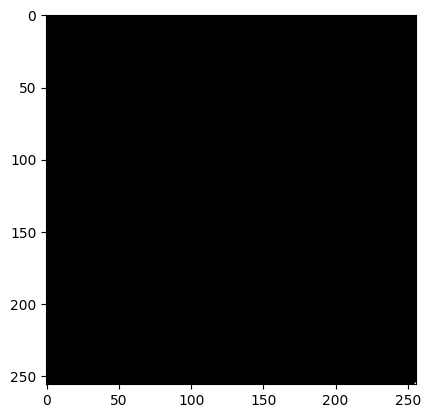

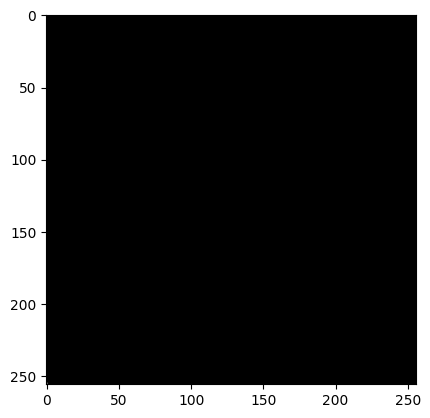

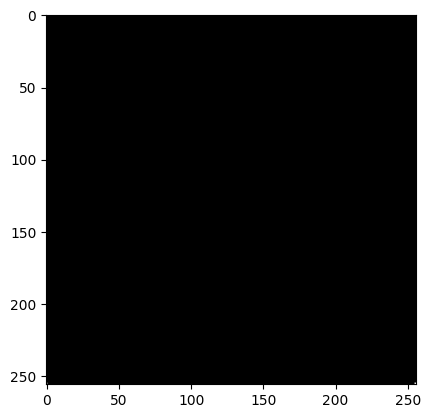

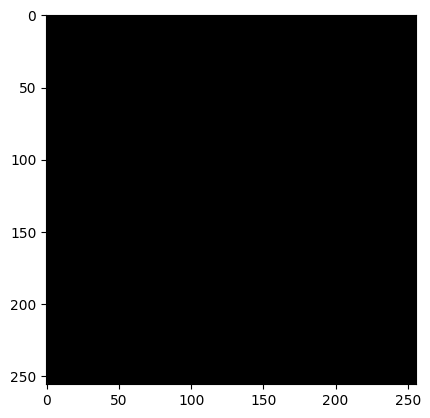

In [ ]:
import matplotlib.pyplot as plt

# Visualize some generated images
generated_images = generator(z)
generated_images = generated_images.cpu().detach().numpy()

for i in range(generated_images.shape[0]):
    plt.imshow(generated_images[i, 0], cmap='gray')
    plt.show()



In [ ]:
!pip install realesrgan --upgrade


In [ ]:
!pip install torchvision --upgrade


In [ ]:
import torchvision
import torch


In [ ]:
# existing esrgan
import tkinter as tk
from tkinter import filedialog
from PIL import Image
import torch
from realesrgan import RealESRGAN
import matplotlib.pyplot as plt

# Function to open file dialog and choose image
def load_image():
    root = tk.Tk()
    root.withdraw()  # Hide the root window
    file_path = filedialog.askopenfilename(title="Select MRI Image", filetypes=[("Image Files", "*.png;*.jpg;*.jpeg")])
    return file_path

# Load image using file dialog
image_path = load_image()

if image_path:
    # Load the selected MRI image
    img = Image.open(image_path).convert('RGB')  # convert to 3 channel even if grayscale

    # Load pretrained Real-ESRGAN model
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = RealESRGAN(device, scale=4)
    model.load_weights('https://github.com/xinntao/Real-ESRGAN/releases/download/v0.2.5/RealESRGAN_x4plus.pth')

    # Super-resolve (enhance)
    sr_image = model.predict(img)

    # Show result
    plt.subplot(1, 2, 1)
    plt.title('Original MRI')
    plt.imshow(img, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title('Enhanced MRI')
    plt.imshow(sr_image, cmap='gray')
    plt.axis('off')

    plt.show()

    # Save enhanced MRI
    sr_image.save('enhanced_mri.png')
else:
    print("No image selected.")


ModuleNotFoundError: No module named 'torchvision.transforms.functional_tensor'

In [ ]:
# Install necessary libraries
!pip install pillow torch torchvision

# Imports
import torch
import torch.nn as nn
from PIL import Image
import os
import numpy as np
from torchvision import transforms
from google.colab import files
import zipfile

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# --- RFB_ESRGAN MODEL SETUP ---
class ResidualBlock(nn.Module):
    def __init__(self, channels):
        super(ResidualBlock, self).__init__()
        self.conv1 = nn.Conv2d(channels, channels, 3, 1, 1)
        self.relu = nn.LeakyReLU(0.2)
        self.conv2 = nn.Conv2d(channels, channels, 3, 1, 1)

    def forward(self, x):
        identity = x
        out = self.conv1(x)
        out = self.relu(out)
        out = self.conv2(out)
        return out + identity

class RFB_ESRGAN_Generator(nn.Module):
    def __init__(self):
        super(RFB_ESRGAN_Generator, self).__init__()
        self.initial = nn.Conv2d(1, 64, 9, 1, 4)
        self.relu = nn.LeakyReLU(0.2)
        self.resblock1 = ResidualBlock(64)
        self.resblock2 = ResidualBlock(64)
        self.mid_conv = nn.Conv2d(64, 64, 3, 1, 1)
        self.upsample = nn.Sequential(
            nn.Conv2d(64, 256, 3, 1, 1),
            nn.PixelShuffle(2),
            nn.LeakyReLU(0.2),
            nn.Conv2d(64, 1, 9, 1, 4)
        )

    def forward(self, x):
        initial = self.relu(self.initial(x))
        x = self.resblock1(initial)
        x = self.resblock2(x)
        x = self.mid_conv(x)
        x = x + initial
        x = self.upsample(x)
        return x

# --- NESRGAN MODEL SETUP ---
class NESRGAN_ResidualBlock(nn.Module):
    def __init__(self, channels):
        super(NESRGAN_ResidualBlock, self).__init__()
        self.block = nn.Sequential(
            nn.Conv2d(channels, channels, 3, 1, 1),
            nn.BatchNorm2d(channels),
            nn.PReLU(),
            nn.Conv2d(channels, channels, 3, 1, 1),
            nn.BatchNorm2d(channels)
        )

    def forward(self, x):
        return x + self.block(x)

class NESRGAN_Generator(nn.Module):
    def __init__(self):
        super(NESRGAN_Generator, self).__init__()
        self.initial = nn.Sequential(
            nn.Conv2d(1, 64, 9, 1, 4),
            nn.PReLU()
        )
        self.residuals = nn.Sequential(
            NESRGAN_ResidualBlock(64),
            NESRGAN_ResidualBlock(64),
            NESRGAN_ResidualBlock(64)
        )
        self.conv_mid = nn.Sequential(
            nn.Conv2d(64, 64, 3, 1, 1),
            nn.BatchNorm2d(64)
        )
        self.upsample = nn.Sequential(
            nn.Conv2d(64, 256, 3, 1, 1),
            nn.PixelShuffle(2),
            nn.PReLU(),
            nn.Conv2d(64, 1, 9, 1, 4)
        )

    def forward(self, x):
        initial = self.initial(x)
        x = self.residuals(initial)
        x = self.conv_mid(x)
        x = x + initial
        x = self.upsample(x)
        return x

# --- Upload and unzip input.zip ---
uploaded = files.upload()

for filename in uploaded.keys():
    if filename.endswith('.zip'):
        with zipfile.ZipFile(filename, 'r') as zip_ref:
            zip_ref.extractall('./input_folder')

input_folder = './input_folder'  # <-- corrected path!

# --- Enhancement function ---
def enhance_mri(generator_class, model_weights, output_suffix):
    generator = generator_class().to(device)
    generator.load_state_dict(torch.load(model_weights, map_location=device))
    generator.eval()

    output_folder = f"./enhanced_{output_suffix}"
    os.makedirs(output_folder, exist_ok=True)

    for filename in os.listdir(input_folder):
        if filename.endswith(".png"):
            img_path = os.path.join(input_folder, filename)
            img = Image.open(img_path).convert('L')
            transform = transforms.Compose([transforms.ToTensor()])
            img_tensor = transform(img).unsqueeze(0).to(device)

            with torch.no_grad():
                enhanced_img_tensor = generator(img_tensor)

            enhanced_img = enhanced_img_tensor.squeeze(0).cpu().numpy()
            enhanced_img = (enhanced_img[0] * 255).clip(0, 255).astype(np.uint8)

            output_image_path = os.path.join(output_folder, filename)
            Image.fromarray(enhanced_img).save(output_image_path)

    print(f"Enhanced images saved in: {output_folder}")
    return output_folder

# --- Create GIF ---
def create_gif(folder_path, gif_output_path):
    slice_files = sorted([f for f in os.listdir(folder_path) if f.endswith('.png')])
    frames = []

    for slice_file in slice_files:
        slice_path = os.path.join(folder_path, slice_file)
        img = Image.open(slice_path).convert('L')
        frames.append(img)

    if not frames:
        print("No enhanced slices found.")
        return

    frames[0].save(
        gif_output_path,
        save_all=True,
        append_images=frames[1:],
        duration=50,
        loop=0
    )

    print(f"GIF created at: {gif_output_path}")

# --- Apply both models ---
rfb_weights_path = '/content/rfb_esrgan_generator.pth'
nesrgan_weights_path = '/content/nesrgan_generator.pth'
   # Change if needed

rfb_output_folder = enhance_mri(RFB_ESRGAN_Generator, rfb_weights_path, "rfb_esrgan")
nesrgan_output_folder = enhance_mri(NESRGAN_Generator, nesrgan_weights_path, "nesrgan")

# --- Create GIF only for NESRGAN enhanced output ---
gif_output_path = './nesrgan_enhanced.gif'
create_gif(nesrgan_output_folder, gif_output_path)

# --- Download GIF and ZIP ---
files.download(gif_output_path)
!zip -r enhanced_nesrgan_slices.zip {nesrgan_output_folder}
files.download('enhanced_nesrgan_slices.zip')


Saving input.zip to input (7).zip
Enhanced images saved in: ./enhanced_rfb_esrgan
Enhanced images saved in: ./enhanced_nesrgan
GIF created at: ./nesrgan_enhanced.gif


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

  adding: enhanced_nesrgan/ (stored 0%)
  adding: enhanced_nesrgan/slice_053.png (deflated 0%)
  adding: enhanced_nesrgan/slice_110.png (deflated 1%)
  adding: enhanced_nesrgan/slice_052.png (deflated 0%)
  adding: enhanced_nesrgan/slice_062.png (deflated 0%)
  adding: enhanced_nesrgan/slice_090.png (deflated 1%)
  adding: enhanced_nesrgan/slice_030.png (deflated 1%)
  adding: enhanced_nesrgan/slice_033.png (deflated 1%)
  adding: enhanced_nesrgan/slice_058.png (deflated 0%)
  adding: enhanced_nesrgan/slice_147.png (deflated 50%)
  adding: enhanced_nesrgan/slice_045.png (deflated 1%)
  adding: enhanced_nesrgan/slice_014.png (deflated 2%)
  adding: enhanced_nesrgan/slice_150.png (deflated 50%)
  adding: enhanced_nesrgan/slice_022.png (deflated 2%)
  adding: enhanced_nesrgan/slice_024.png (deflated 2%)
  adding: enhanced_nesrgan/slice_088.png (deflated 0%)
  adding: enhanced_nesrgan/slice_119.png (deflated 1%)
  adding: enhanced_nesrgan/slice_133.png (deflated 3%)
  adding: enhanced_nesr

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>